In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [127]:
df_white = pd.read_csv("data/winequality-white.csv", sep=";")
df_white.insert(0, "wine color", "white")
print("White shape:", df_white.shape)

df_red = pd.read_csv("data/winequality-red.csv", sep=";")
df_red.insert(0, "wine color", "red")
print("Red shape:", df_red.shape)

df_wine = pd.concat([df_white, df_red])
print("Summary shape:", df_wine.shape)


White shape: (4898, 13)
Red shape: (1599, 13)
Summary shape: (6497, 13)


In [128]:
df_wine.head()


,wine color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Exercise 1.2a


In [129]:
df_wine["alcohol"].describe()


count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

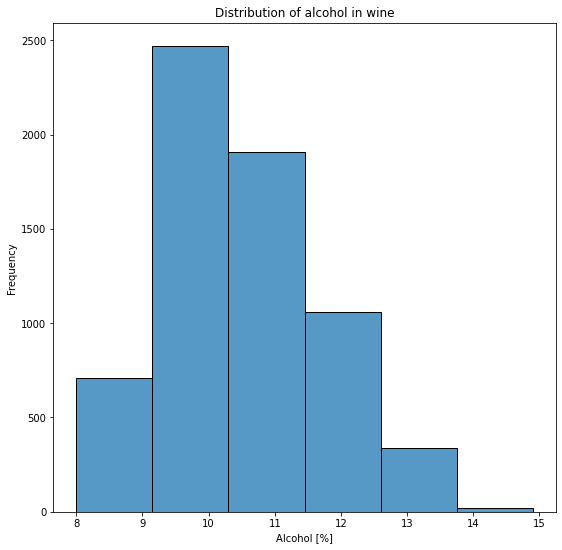

In [130]:
bins = (
    int(df_wine["alcohol"].max()) -
    int(df_wine["alcohol"].min())
    )

plt.figure(figsize=(9, 9))

sns.histplot(data=df_wine, x="alcohol", bins=bins)
plt.title("Distribution of alcohol in wine")
plt.xlabel("Alcohol [%]")
plt.ylabel("Frequency")
plt.show()


### Exercise 1.2b


In [131]:
print("Red wine:")
print(df_wine[df_wine["wine color"] == "red"]["alcohol"].describe())

print()

print("White wine:")
print(df_wine[df_wine["wine color"] == "white"]["alcohol"].describe())


Red wine:
count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

White wine:
count    4898.000000
mean       10.514267
std         1.230621
min         8.000000
25%         9.500000
50%        10.400000
75%        11.400000
max        14.200000
Name: alcohol, dtype: float64


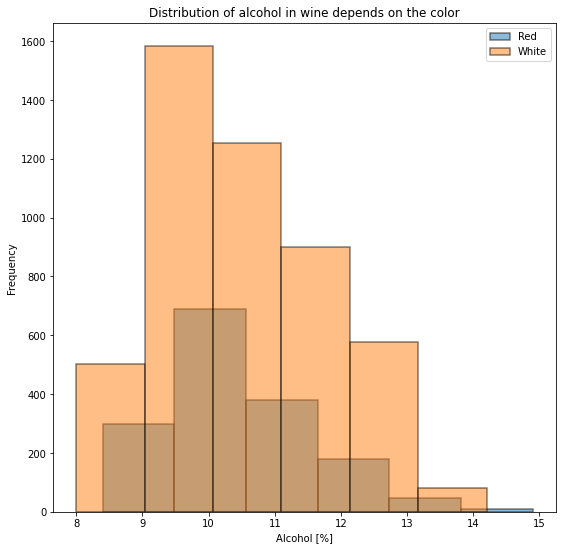

In [132]:
plt.figure(figsize=(9, 9))

plt.hist(
    df_wine[df_wine["wine color"] == "red"]["alcohol"],
    bins=bins, alpha=0.5, label="Red", edgecolor="black", linewidth=1.5
    )

plt.hist(
    df_wine[df_wine["wine color"] == "white"]["alcohol"],
    bins=bins, alpha=0.5, label="White", edgecolor="black", linewidth=1.5
    )

plt.title("Distribution of alcohol in wine depends on the color")
plt.xlabel("Alcohol [%]")
plt.ylabel("Frequency")
plt.legend()
plt.show()


### Exercise 1.2c


In [133]:
df_wine["quality"].describe()


count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [134]:
pearson = df_wine["quality"].corr(df_wine["alcohol"], method="pearson")
print("Pearson Corelation: ", pearson)

spearman = df_wine["quality"].corr(df_wine["alcohol"], method="spearman")
print("Spearman Corelation:", spearman)


Pearson Corelation:  0.4443185200076541
Spearman Corelation: 0.44692547881435385


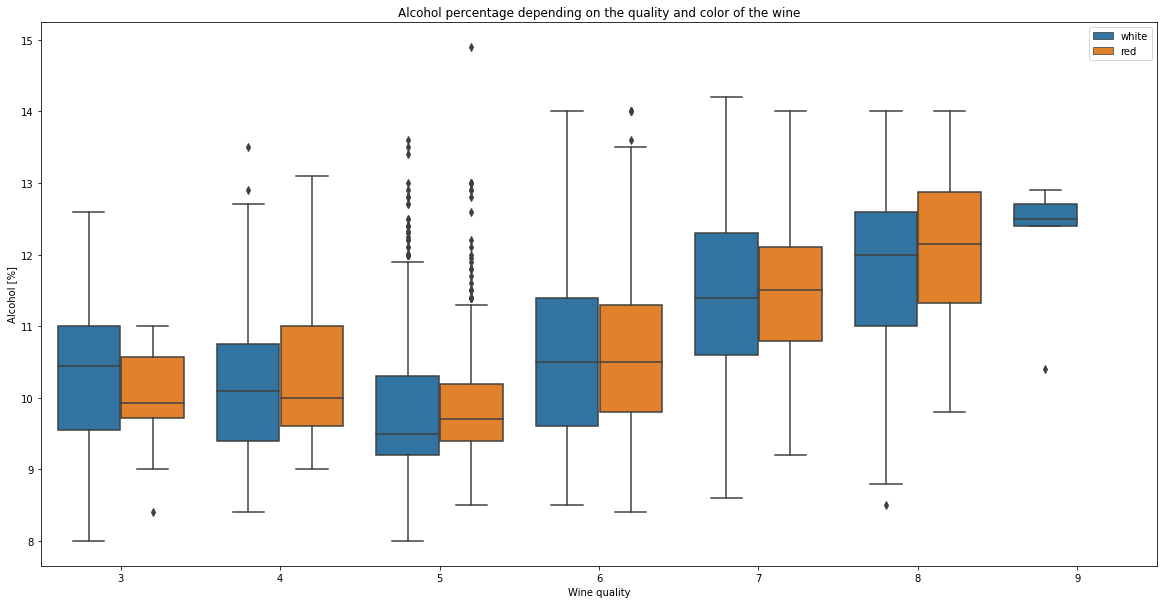

In [153]:
quality_unique: list[int] = list(df_wine["quality"].unique())
wine_color_unique: list[str] = list(df_wine["wine color"].unique())

data_for_plot = []

for quality in quality_unique:
    for wine_color in wine_color_unique:

        df_color = df_wine[df_wine["wine color"] == wine_color]
        df_quality = df_color[df_color["quality"] == quality]
        df_alcohol = df_quality["alcohol"]

        for alcohol in df_alcohol:
            data_for_plot.append([wine_color, quality, alcohol])


df_plot = pd.DataFrame(
    data_for_plot,
    columns=["wine color", "quality", "alcohol"]
    )

plt.figure(figsize=(20, 10))

sns.boxplot(x="quality", y="alcohol", hue="wine color", data=df_plot)

plt.title("Alcohol percentage depending on the quality and color of the wine")
plt.xlabel("Wine quality")
plt.ylabel("Alcohol [%]")
plt.legend()
plt.show()


### Exercise 1.2d


In [145]:
df_wine["density"].describe()


count    6497.000000
mean        0.994697
std         0.002999
min         0.987110
25%         0.992340
50%         0.994890
75%         0.996990
max         1.038980
Name: density, dtype: float64

In [169]:
pearson = df_wine["density"].corr(df_wine["alcohol"], method="pearson")
print("Pearson Corelation: ", pearson)

spearman = df_wine["density"].corr(df_wine["alcohol"], method="spearman")
print("Spearman Corelation:", spearman)


Pearson Corelation:  -0.6867454216821347
Spearman Corelation: -0.6994424737439913


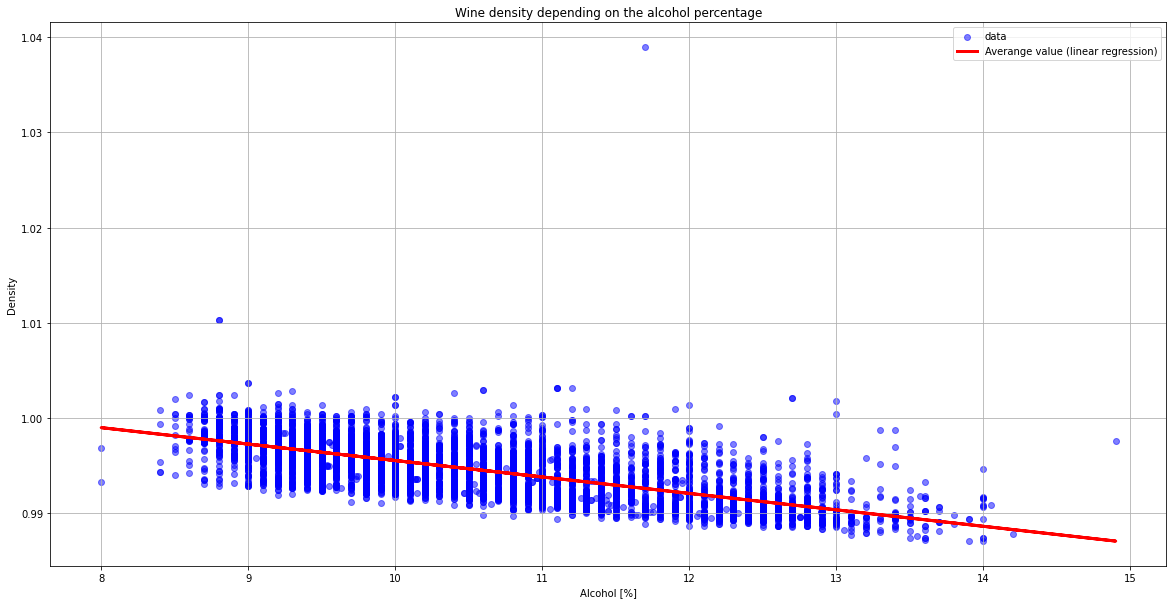

In [162]:
params = np.polyfit(
    df_wine["alcohol"],
    df_wine["density"],
    1  # 1 - linear regression
    )

regression_line = np.poly1d(params)(df_wine["alcohol"])

plt.figure(figsize=(20, 10))

plt.scatter(
    df_wine["alcohol"], df_wine["density"],
    c="blue", marker="o", alpha=0.5, label="data"
    )

plt.plot(
    df_wine["alcohol"], regression_line,
    c="r", label="Averange value (linear regression)", linewidth=3
    )

plt.title("Wine density depending on the alcohol percentage")
plt.xlabel("Alcohol [%]")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()
